In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sales_train = pd.read_csv('./data/sales_train.csv')
categories = pd.read_csv('./data/item_categories.csv')
items = pd.read_csv('./data/items.csv')
sample_submission = pd.read_csv('./data/sample_submission.csv')
shops = pd.read_csv('./data/shops.csv')
test = pd.read_csv('./data/test.csv').set_index('ID')

sales_train 데이터 확인

In [3]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [4]:
sales_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [6]:
sales_train.corr() # 상관관계 확인

,date_block_num,shop_id,item_id,item_price,item_cnt_day
date_block_num,1.000000,0.019273,0.009356,0.095010,0.009402
shop_id,0.019273,1.000000,0.029396,-0.024034,-0.005230
item_id,0.009356,0.029396,1.000000,-0.134104,0.016650
item_price,0.095010,-0.024034,-0.134104,1.000000,0.011197
item_cnt_day,0.009402,-0.005230,0.016650,0.011197,1.000000


날짜 바꾸기

In [8]:
from datetime import datetime

In [9]:
sales_train.date = sales_train.date.apply(lambda x : datetime.strptime(x,'%d.%m.%Y'))
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


### 중복값 확인

In [10]:
sales_train.duplicated().sum()  # train데이터 중복행 6개

6

In [11]:
print(test.duplicated().sum())
print(items.duplicated().sum())
print(categories.duplicated().sum())
print(shops.duplicated().sum())

0
0
0
0


In [12]:
sales_train[sales_train.duplicated()==True]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
76962,2013-01-05,0,54,20130,149.0,1.0
1435367,2014-02-23,13,50,3423,999.0,1.0
1496766,2014-03-23,14,21,3423,999.0,1.0
1671873,2014-05-01,16,50,3423,999.0,1.0
1866340,2014-07-12,18,25,3423,999.0,1.0
2198566,2014-12-31,23,42,21619,499.0,1.0


In [13]:
# sales_train 데이터의 중복행 6개 제거
sales_train.drop_duplicates(inplace=True)

In [14]:
sales_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935843 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype         
---  ------          -----         
 0   date            datetime64[ns]
 1   date_block_num  int64         
 2   shop_id         int64         
 3   item_id         int64         
 4   item_price      float64       
 5   item_cnt_day    float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 156.8 MB


### 결측치 확인

In [15]:
sales_train.isnull().sum()   # train 데이터 결측치 없음

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [16]:
test.isnull().sum()

shop_id    0
item_id    0
dtype: int64

### 이상치 제거

<AxesSubplot:xlabel='item_price'>

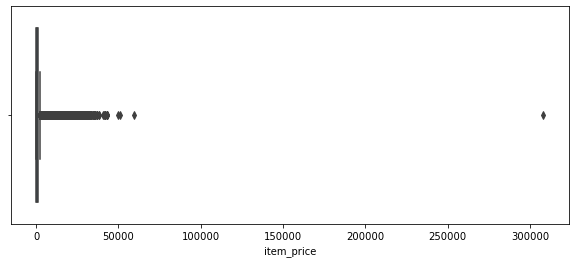

In [17]:
plt.figure(figsize=(10,4))
sns.boxplot(x=sales_train['item_price'])

<AxesSubplot:xlabel='item_cnt_day'>

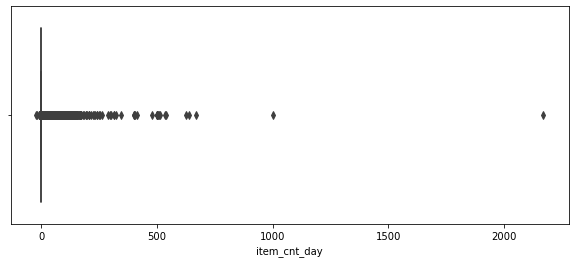

In [18]:
plt.figure(figsize=(10,4))
sns.boxplot(x=sales_train['item_cnt_day'])

In [19]:
# item_cnt_day 500이상, item_price 50,000이상의 이상치 제거

sales_train = sales_train[sales_train.item_cnt_day<500]
sales_train = sales_train[sales_train.item_price<50000]

<AxesSubplot:xlabel='item_cnt_day'>

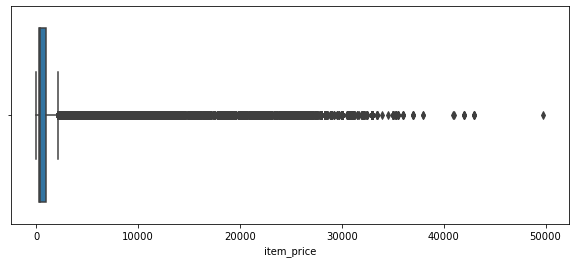

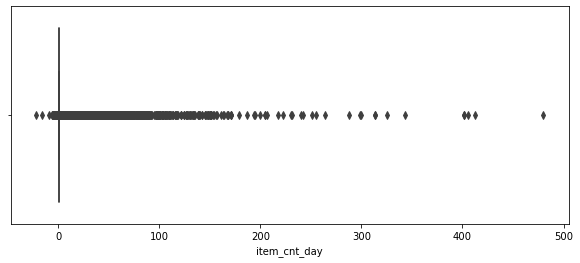

In [20]:
plt.figure(figsize=(10,4))
sns.boxplot(x=sales_train['item_price'])

plt.figure(figsize=(10,4))
sns.boxplot(x=sales_train['item_cnt_day'])

In [21]:
# item_price와 item_cnt_day가 0미만인 수 제거

sales_train = sales_train[sales_train.item_cnt_day >= 0]
sales_train = sales_train[sales_train.item_price >= 0]

### shops

In [22]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [23]:
 shops['city'] = shops['shop_name'].str.split(' ').map(lambda x: x[0])

In [24]:
shops.head()

,shop_name,shop_id,city
0,"!Якутск Орджоникидзе, 56 фран",0,!Якутск
1,"!Якутск ТЦ ""Центральный"" фран",1,!Якутск
2,"Адыгея ТЦ ""Мега""",2,Адыгея
3,"Балашиха ТРК ""Октябрь-Киномир""",3,Балашиха
4,"Волжский ТЦ ""Волга Молл""",4,Волжский


In [25]:
shops.city.value_counts()

Москва              13
Тюмень               3
Воронеж              3
РостовНаДону         3
!Якутск              2
Красноярск           2
Якутск               2
Уфа                  2
Самара               2
СПб                  2
Новосибирск          2
Н.Новгород           2
Казань               2
Жуковский            2
Коломна              1
Сургут               1
Балашиха             1
Чехов                1
Цифровой             1
Химки                1
Волжский             1
Вологда              1
Томск                1
Сергиев              1
Курск                1
Выездная             1
Интернет-магазин     1
Омск                 1
Адыгея               1
Мытищи               1
Калуга               1
Ярославль            1
Name: city, dtype: int64

In [26]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
shops['city_code'] = lb.fit_transform(shops['city'])

In [27]:
shops.head()   # 라벨 인코더를 시켜 범주화

,shop_name,shop_id,city,city_code
0,"!Якутск Орджоникидзе, 56 фран",0,!Якутск,0
1,"!Якутск ТЦ ""Центральный"" фран",1,!Якутск,0
2,"Адыгея ТЦ ""Мега""",2,Адыгея,1
3,"Балашиха ТРК ""Октябрь-Киномир""",3,Балашиха,2
4,"Волжский ТЦ ""Волга Молл""",4,Волжский,3


In [28]:
shops = shops[['shop_id', 'city_code']]
shops.head()

,shop_id,city_code
0,0,0
1,1,0
2,2,1
3,3,2
4,4,3


### item categories

In [29]:
categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [30]:
categories['split_name'] = categories['item_category_name'].str.split('-')
categories['type'] = categories['split_name'].map(lambda x: x[0].strip())
categories['type_code'] = lb.fit_transform(categories['type'])

In [32]:
categories.head()

,item_category_name,item_category_id,split_name,type,type_code
0,PC - Гарнитуры/Наушники,0,"[PC , Гарнитуры/Наушники]",PC,0
1,Аксессуары - PS2,1,"[Аксессуары , PS2]",Аксессуары,1
2,Аксессуары - PS3,2,"[Аксессуары , PS3]",Аксессуары,1
3,Аксессуары - PS4,3,"[Аксессуары , PS4]",Аксессуары,1
4,Аксессуары - PSP,4,"[Аксессуары , PSP]",Аксессуары,1


In [33]:
categories['subtype'] = categories['split_name'].map(lambda x: x[1].strip() if len(x) > 1 else x[0].strip())
categories['subtype_code'] = lb.fit_transform(categories['subtype'])

In [34]:
categories.head()

,item_category_name,item_category_id,split_name,type,type_code,subtype,subtype_code
0,PC - Гарнитуры/Наушники,0,"[PC , Гарнитуры/Наушники]",PC,0,Гарнитуры/Наушники,29
1,Аксессуары - PS2,1,"[Аксессуары , PS2]",Аксессуары,1,PS2,9
2,Аксессуары - PS3,2,"[Аксессуары , PS3]",Аксессуары,1,PS3,10
3,Аксессуары - PS4,3,"[Аксессуары , PS4]",Аксессуары,1,PS4,11
4,Аксессуары - PSP,4,"[Аксессуары , PSP]",Аксессуары,1,PSP,13


In [35]:
categories = categories[['item_category_id', 'type_code', 'subtype_code']]

In [36]:
categories.head()

,item_category_id,type_code,subtype_code
0,0,0,29
1,1,1,9
2,2,1,10
3,3,1,11
4,4,1,13


### items

In [37]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [38]:
# 이미 item_id와 item_category_id가 숫자로 매핑되어 있어 name만 drop 해주면 됨

items.drop(['item_name'], axis=1, inplace=True)
items.head()

,item_id,item_category_id
0,0,40
1,1,76
2,2,40
3,3,40
4,4,40


Encoding된 자료 확인하기

In [39]:
shops.head()

,shop_id,city_code
0,0,0
1,1,0
2,2,1
3,3,2
4,4,3


In [40]:
categories.head()

,item_category_id,type_code,subtype_code
0,0,0,29
1,1,1,9
2,2,1,10
3,3,1,11
4,4,1,13


In [41]:
items.head()

,item_id,item_category_id
0,0,40
1,1,76
2,2,40
3,3,40
4,4,40


### test데이터의 shop_id, item_id

In [42]:
test.head()

,shop_id,item_id
ID,,
0,5,5037
1,5,5320
2,5,5233
3,5,5232
4,5,5268


In [43]:
test.shop_id.value_counts()

5     5100
56    5100
53    5100
52    5100
47    5100
48    5100
57    5100
58    5100
59    5100
55    5100
36    5100
4     5100
37    5100
35    5100
38    5100
34    5100
46    5100
41    5100
44    5100
39    5100
49    5100
50    5100
42    5100
19    5100
6     5100
3     5100
2     5100
7     5100
10    5100
12    5100
28    5100
31    5100
26    5100
25    5100
22    5100
24    5100
21    5100
15    5100
16    5100
18    5100
14    5100
45    5100
Name: shop_id, dtype: int64

In [44]:
len(test.shop_id.unique())

# 총 42개의 shop_id가 있으며 shop_id마다 5,100개의 item이 있다.

42

In [45]:
len(set(test.item_id) - set(sales_train.item_id))

# df_test에는 있지만 df_train에는 없는 item_id가 총 363개
# 이는 df_train에 모든 종류의 item이 있지는 않다는 것을 뜻한다. 
# 363개의 item에 대해서는 0개가 판매된 것으로 예측해야한다.

363

In [46]:
len(test) == 42*5100

True

### 'date_block_num', 'shop_id', 'item_id'로 구성된 Matrix 만들기

In [47]:
num_date_block_num = len(sales_train.date_block_num.value_counts())
num_date_block_num

34

In [49]:
import itertools

matrix = []
cols = ['date_block_num', 'shop_id', 'item_id']
for i in range(34):
    sales = sales_train[sales_train.date_block_num == i]
    matrix.append(np.array(list(itertools.product([i], 
        sales.shop_id.unique(), sales.item_id.unique())), dtype='int16'))
matrix = pd.DataFrame(np.vstack(matrix), columns=cols)
# int8 -> Byte (-128 to 127), int16 -> Integer (-32768 to 32767)
matrix['date_block_num'] = matrix['date_block_num'].astype(np.int8)
matrix['shop_id'] = matrix['shop_id'].astype(np.int8)
matrix['item_id'] = matrix['item_id'].astype(np.int16)
matrix.sort_values(cols, inplace=True)

In [50]:
matrix.head()

,date_block_num,shop_id,item_id
139168,0,0,19
141406,0,0,27
144881,0,0,28
142572,0,0,29
138861,0,0,32
